In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import nci_eval.metrics as metrics

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [5]:
cls_one_tprs = [0.01, 0.11, 0.21, 0.23, 0.26, 0.31, 0.33, 0.36, 0.42, 0.46, 0.76, 0.82, 0.88, 0.92, 0.95, 0.96, 0.97, 0.99, 1]
cls_two_tprs = [0.01, 0.15, 0.28, 0.33, 0.35, 0.37, 0.39, 0.40, 0.42, 0.46, 0.56, 0.64, 0.72, 0.75, 0.81, 0.85, 0.86, 0.93, 1]
cls_one_fprs = [0.000001, 0.00003, 0.0005, 0.0006, 0.0008, 0.001, 0.0015, 0.0019, 0.0022, 0.0028, 0.007, 0.011, 0.22, 0.26, 0.38, 0.49, 0.55, 0.79, 1]
cls_two_fprs = [0.000001, 0.00001, 0.0002, 0.00025, 0.00030, 0.00035, 0.0004, 0.00045, 0.0005, 0.0006, 0.0007, 0.001, 0.02, 0.3, 0.5, 0.6, 0.7, 0.8, 1]

In [6]:
def plot_roc(cls_one_tprs, cls_one_fprs, cls_two_tprs, cls_two_fprs):
    
    plt.plot(cls_one_fprs, cls_one_tprs, label='Classifier 1', c='k')
    plt.plot(cls_two_fprs, cls_two_tprs, label='Classifier 2', c='k', linestyle='--')
    
    plt.title('ROC Curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.rc('font', family='serif')
    plt.rc('xtick', labelsize='x-small')
    plt.rc('ytick', labelsize='x-small')
    

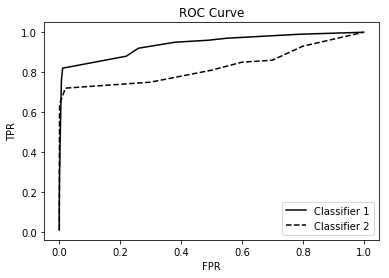

In [7]:
plot_roc(cls_one_tprs, cls_one_fprs, cls_two_tprs, cls_two_fprs)

In [10]:
def plot_log_roc(cls_one_tprs, cls_one_fprs, cls_two_tprs, cls_two_fprs):
    
    plt.plot(cls_one_fprs, cls_one_tprs, label='Classifier 1', c='k')
    plt.plot(cls_two_fprs, cls_two_tprs, label='Classifier 2', c='k', linestyle='--')
    
    plt.title('Log-ROC Curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.semilogx()
    plt.legend()
    plt.rc('font', family='serif')
    plt.rc('xtick', labelsize='x-small')
    plt.rc('ytick', labelsize='x-small')
    

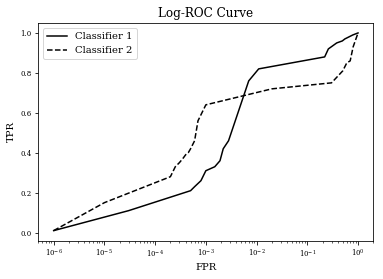

In [11]:
plot_log_roc(cls_one_tprs, cls_one_fprs, cls_two_tprs, cls_two_fprs)

In [34]:
def plot_auc_prcurve_positive_prior(cls_one_tprs, cls_one_fprs, cls_two_tprs, cls_two_fprs, positive_prior):
    
    cls_one_prec = [metrics.precision_from_tpr_fpr(tpr, fpr, positive_prior) for (tpr, fpr) in zip(cls_one_tprs, cls_one_fprs)]
    cls_two_prec = [metrics.precision_from_tpr_fpr(tpr, fpr, positive_prior) for (tpr, fpr) in zip(cls_two_tprs, cls_two_fprs)]
    
    plt.plot(cls_one_tprs, cls_one_prec, label='Classifier 1 [AUPRC=%.2f]' % (np.trapz(cls_one_prec, cls_one_tprs)), c='k')
    plt.plot(cls_two_tprs, cls_two_prec, label='Classifier 2 [AUPRC=%.2f]' % (np.trapz(cls_two_prec, cls_two_tprs)), c='k', linestyle='--')
    
    plt.title('Area under PR Curve at $\eta$ = %g' % (positive_prior))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.rc('font', family='serif')
    plt.rc('xtick', labelsize='x-small')
    plt.rc('ytick', labelsize='x-small')
    

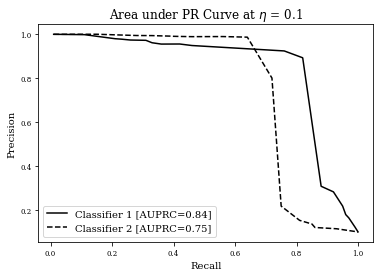

In [35]:
plot_auc_prcurve_positive_prior(cls_one_tprs, cls_one_fprs, cls_two_tprs, cls_two_fprs, positive_prior=0.1)

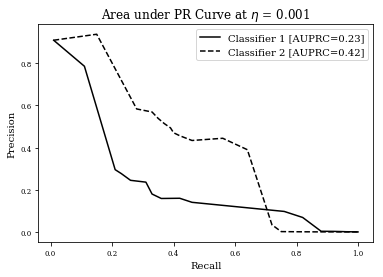

In [36]:
plot_auc_prcurve_positive_prior(cls_one_tprs, cls_one_fprs, cls_two_tprs, cls_two_fprs, positive_prior=0.001)

In [37]:
def plot_auc_prcurve_positive_priors(cls_one_tprs, cls_one_fprs, cls_two_tprs, cls_two_fprs, positive_priors):
    
    def auprc_positive_prior(tprs, fprs, positive_prior):
        prec = [metrics.precision_from_tpr_fpr(tpr, fpr, positive_prior) for (tpr, fpr) in zip(tprs, fprs)]
        return np.trapz(prec, tprs)
    
    cls_one_auprc = [auprc_positive_prior(cls_one_tprs, cls_one_fprs, pp) for pp in positive_priors]
    cls_two_auprc = [auprc_positive_prior(cls_two_tprs, cls_two_fprs, pp) for pp in positive_priors]
    
    plt.plot(positive_priors, cls_one_auprc, label='Classifier 1', c='k')
    plt.plot(positive_priors, cls_two_auprc, label='Classifier 2', c='k', linestyle='--')
    
    plt.title('Impact of Positive prevalence on Area under PR Curve')
    plt.xlabel('Positive prevalence ($\eta$)')
    plt.ylabel('Area under PR Curve')
    plt.semilogx()
    plt.legend()
    plt.rc('font', family='serif')
    plt.rc('xtick', labelsize='x-small')
    plt.rc('ytick', labelsize='x-small')
    

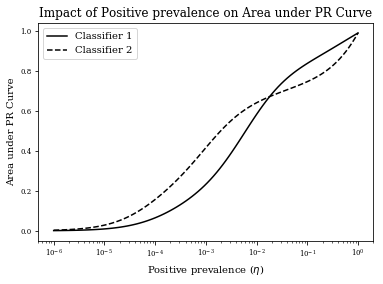

In [38]:
plot_auc_prcurve_positive_priors(cls_one_tprs, cls_one_fprs, cls_two_tprs, cls_two_fprs, positive_priors=np.logspace(-6, 0, num=100))